In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
mean1=[2,4]
mean2=[7,9]
cov1=[[1,0.1],[0.1,1.2]]
cov2=[[1.3,0.2],[0.2,1.1]]
dist1=np.random.multivariate_normal(mean1,cov1,500)
dist2=np.random.multivariate_normal(mean2,cov2,500)
print(dist1.shape,dist2.shape)

(500, 2) (500, 2)


## Visualization

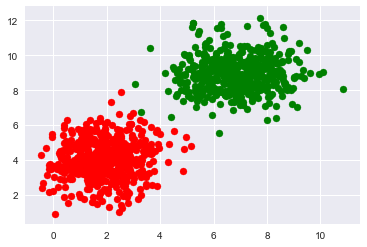

In [3]:
plt.scatter(dist1[:,0],dist1[:,1],color='r')
plt.scatter(dist2[:,0],dist2[:,1],color='g')
plt.show()

In [4]:
y0=np.zeros(500).reshape(-1,1)
y1=np.ones(500).reshape(-1,1)
y_train=np.vstack((y0,y1)).reshape(-1,)  # Output
x_train=np.vstack((dist1,dist2))

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
xTrain,xTest,yTrain,yTest=train_test_split(x_train,y_train,test_size=0.2)
print(xTrain.shape,yTrain.shape)
print(xTest.shape,yTest.shape)

(800, 2) (800,)
(200, 2) (200,)


## Logistic Regression

In [19]:
def hypothesis(x,theta,bias):
    return sigmoid(bias + np.dot(x,theta))

def sigmoid(z):
    return (1.0/(1.0 + np.exp(-1*z)))

def error(X,Y,theta,bias):  # cost function
    err=0.0
    m=X.shape[0]
    for i in range(m):
        hx=hypothesis(X[i],theta,bias)
        err+=Y[i]*np.log(hx)+(1-Y[i])*np.log(1-hx)
    return -err/m

def gradient(X,Y,theta,bias):
    grad=np.zeros(X.shape[1])
    gradBias=0.0
    m=X.shape[0]
    for i in range(m):
        hx=hypothesis(X[i],theta,bias)
        grad+=(Y[i]-hx)*X[i]
        gradBias+=Y[i]-hx
            
    return grad/m,gradBias/m

def predict(x,theta,bias):
    if hypothesis(x,theta,bias)>=0.5:
        return 1
    else:
        return 0

def acc(xTest,yTest,theta,bias):
    sum=0
    for i in range(xTest.shape[0]):
        if yTest[i]==predict(xTest[i],theta,bias):
            sum+=1
    return float(sum/xTest.shape[0])        

def logisticRegression(X,Y,learning):
    theta=np.random.rand(X.shape[1])*2
    bias=np.random.rand()*5
    err=[error(X,Y,theta,bias)]
    itr=0
    while itr<=1500:
        grad,gradBias=gradient(X,Y,theta,bias)
        theta=theta + learning*grad
        bias= bias + learning*gradBias
        err.append(error(X,Y,theta,bias))
        itr+=1
    
    return theta,bias,err
        

In [20]:
theta,bias,err=logisticRegression(xTrain,yTrain,0.1)
print("Accuracy: {}".format(acc(xTest,yTest,theta,bias)))

Accuracy: 0.99


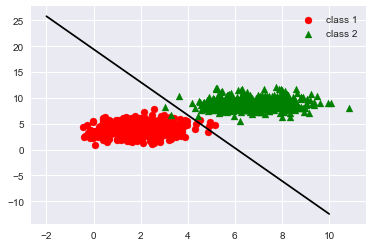

In [18]:
plt.scatter(dist1[:,0],dist1[:,1],c='r',label='class 1')
plt.scatter(dist2[:,0],dist2[:,1],c='g',label='class 2',marker='^')
plt.legend()
x1=np.linspace(-2,10,10)
x2=-(bias+theta[0]*x1)/theta[1]
plt.plot(x1,x2,c='black')

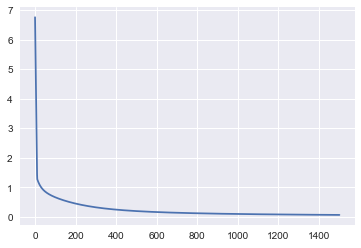

In [10]:
plt.plot(err)